In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv('bank_marketing_part1_Data.csv')
df

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
...,...,...,...,...,...,...,...
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443


# Q 1.1

In [ ]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


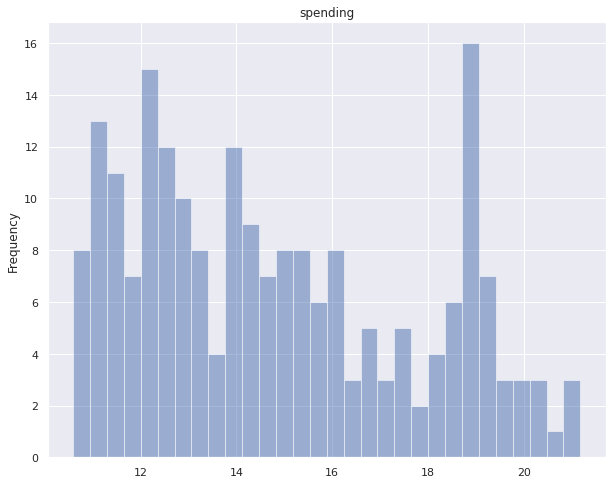

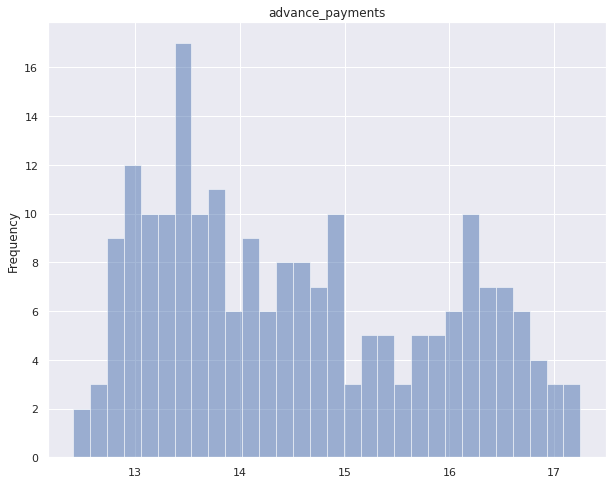

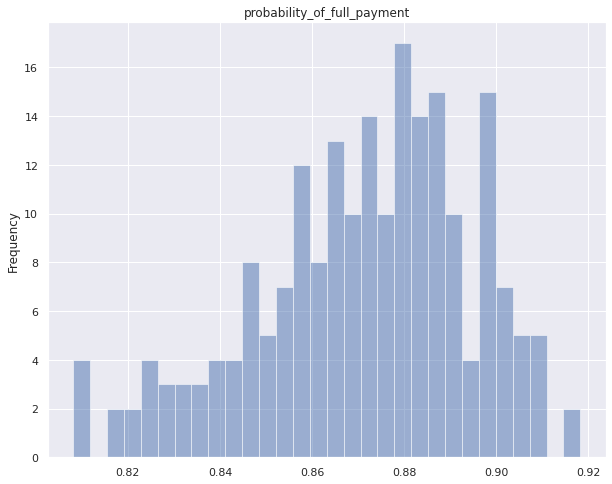

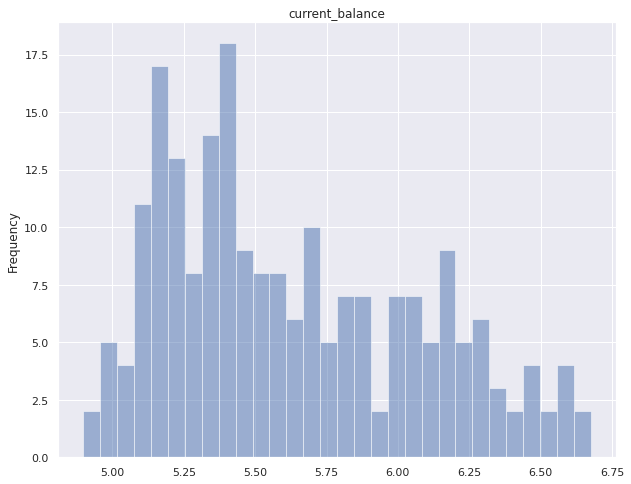

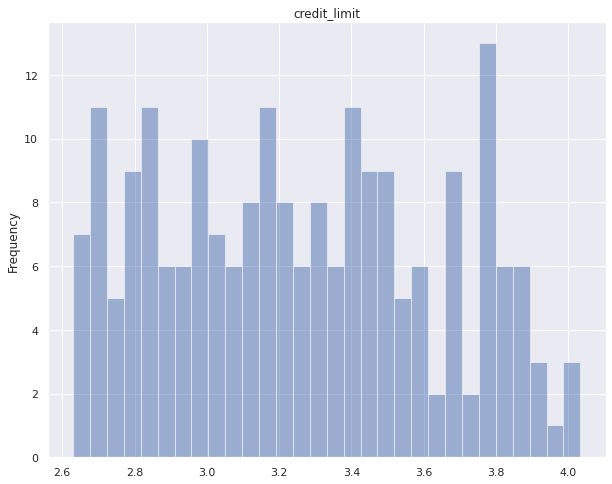

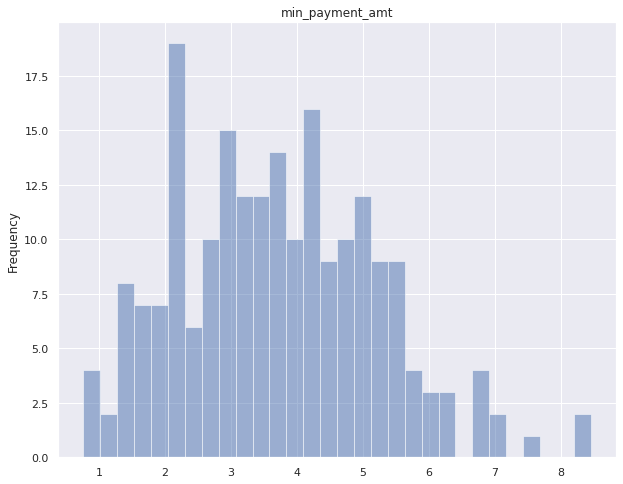

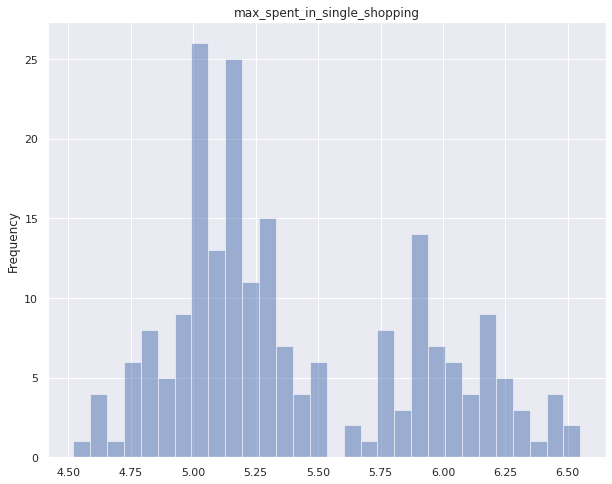

In [ ]:
for c in df.columns:
    df[c].plot.hist(bins=30, alpha=0.5)
    plt.title(c)
    plt.show()

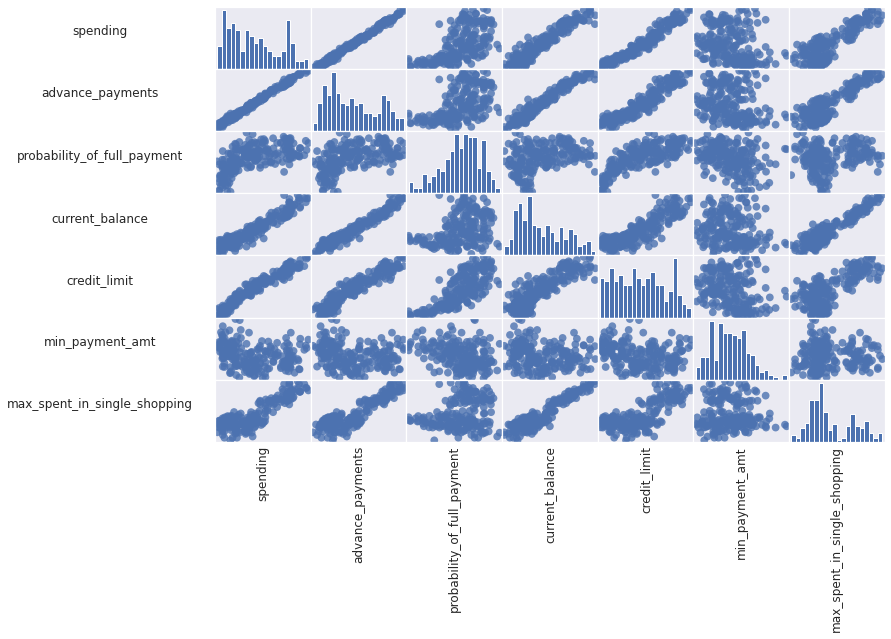

In [ ]:
# Pair plot

sm = pd.plotting.scatter_matrix(df, figsize=(12,8), marker='o',hist_kwds={'bins': 20}, s=60, alpha=.8)
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1.2,0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]
plt.show()

#### We observe an interesting pattern here. Most of the data are `linearly dependent` on each other. 

Example: Variables **credit_limit**, **max_spent_in_single_shopping**, **current_balance**, and **advance_payment** are linearly dependent on **spending**.

### Correlation Matrix

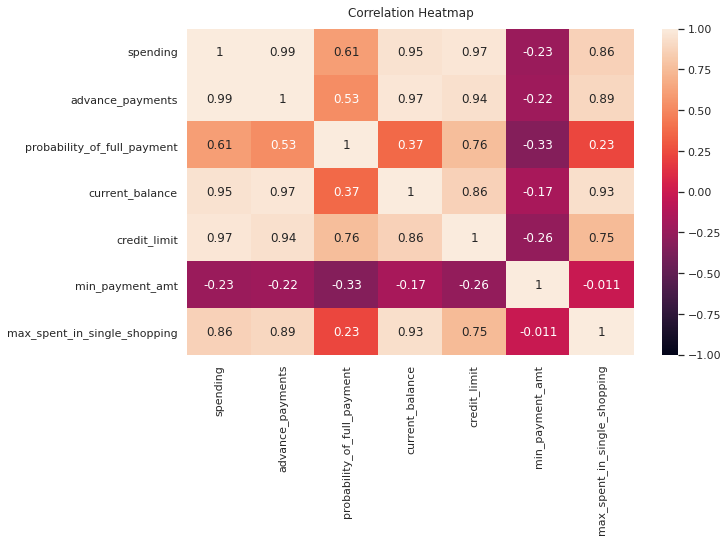

In [ ]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

#### We see **high** correlation values (both positive and negative but mostly positive) between all the variables

### We dont find any outliers in the variables (the black scatter points represents outliers before scaling)

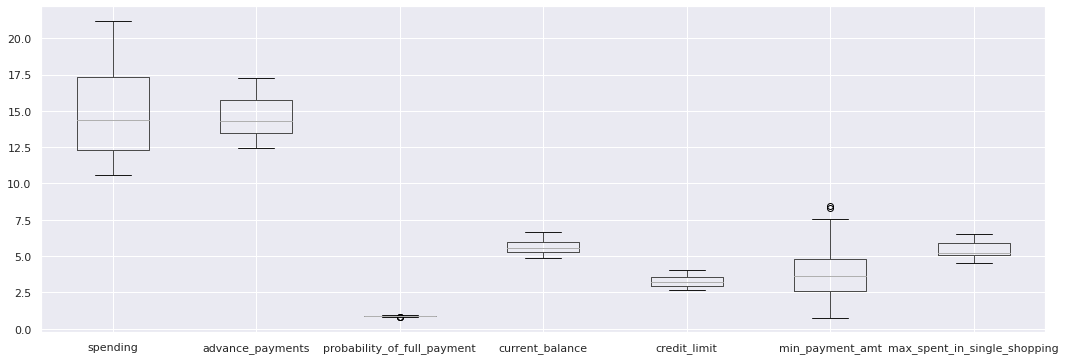

In [ ]:
df.boxplot(figsize=(18,6))
plt.show()

# Q 1.2

**Scaling**: Since the `mean` and `std` of the variables are different from each other and their variation (difference in range) is very significant, therefore scaling is necessary for clustering in order to transform the variables into same range.

In [ ]:
import copy
scaler = MinMaxScaler()
df_scale = df.copy() 
df_scale[df_scale.columns] = scaler.fit_transform(df[df.columns])
df_scale

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,0.882908,0.931818,0.608893,1.000000,0.807555,0.323356,1.000000
1,0.509915,0.512397,0.892015,0.261261,0.678546,0.334278,0.307730
2,0.789424,0.828512,0.678766,0.759572,0.801853,0.338439,0.802068
3,0.022663,0.113636,0.016334,0.213401,0.007840,0.574302,0.327917
4,0.698772,0.712810,0.826679,0.557995,0.758375,0.169408,0.648941
...,...,...,...,...,...,...,...
205,0.311615,0.332645,0.725045,0.304054,0.405560,0.418794,0.107829
206,0.583569,0.663223,0.505445,0.578829,0.575909,0.540236,0.628262
207,0.324835,0.361570,0.648820,0.303491,0.406985,0.123770,0.237322
208,0.522191,0.535124,0.833938,0.456081,0.609408,0.195673,0.454948


# Q 1.3

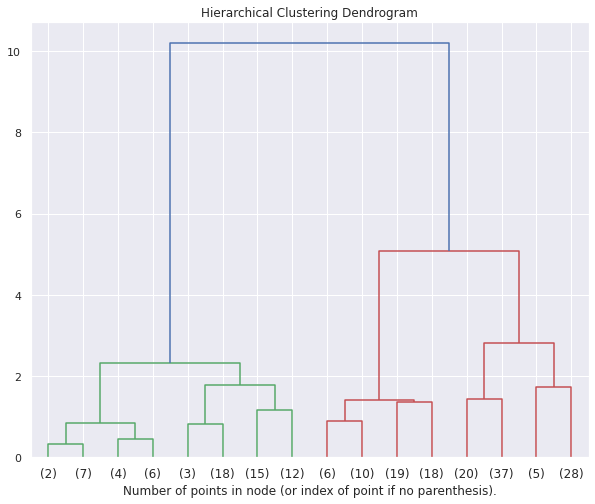

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df_scale)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

#### If we consider the dissimilarity to be not greater than $1.5-1.8$ (y-axis of the dendrogram) sufficient enough for forming a cluster, then we find that the optimum number of clusters are $6$. 

#### **One** cluster from (2) to (6), **Second** cluster from (3) to (18), **Third** one from (15) to (12), **Fourth** cluster from (6) to (18), then (20) to (37) and finally (5) to (28) makes a total of $6$ clusters.

## Q1.4

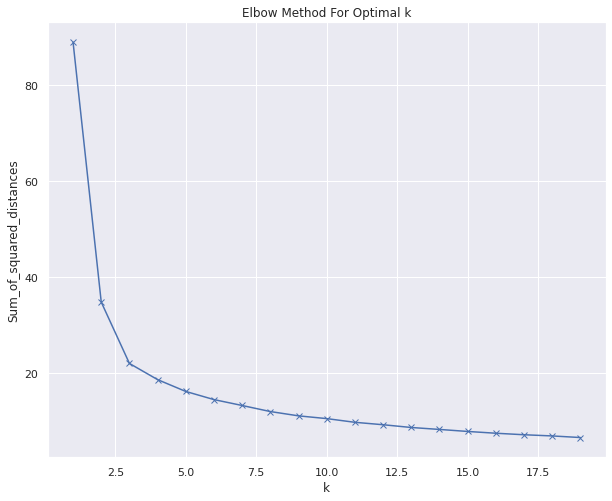

In [ ]:
### ELBOW METHOD ###

Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k, random_state=10)
    km = km.fit(df_scale)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### In the plot above the elbow is at $k=6$ indicating the optimal k for this dataset is $6$ after which distance is almost converged which is in agreement to the hierarchical clustering!

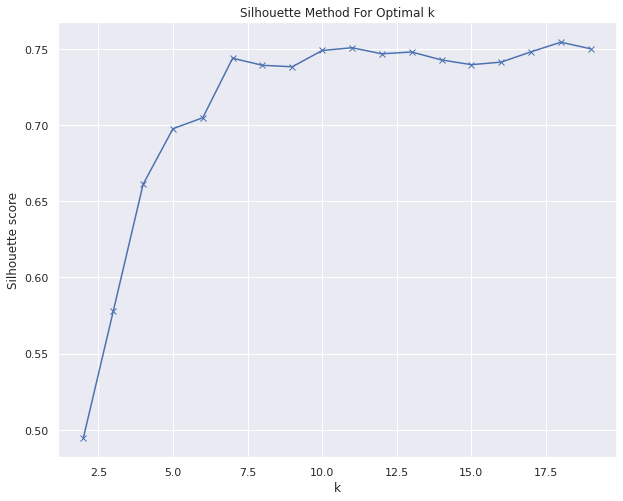

In [ ]:
### SILHOUTTE METHOD ###

S = []
K = range(2,20)
for k in K:
    km = KMeans(n_clusters=k, random_state=10)
    df_labels = km.fit_predict(df_scale)
    sc = 1-silhouette_score(df_scale, df_labels)
    S.append(sc)

plt.plot(K, S, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method For Optimal k')
plt.show()

#### Here also we see that $k=6$ is the optimum number of clusters after which silhouette score is converged! So our finalised number of clusters are $6$.

## Q 1.5

From the business perspective, these $6$ different clusters can represent different classes of customer which are segmented into different clusters based on their spending,	advance_payments,	probability_of_full_payment,	current_balance,	credit_limit and other features. 

Maybe one cluster represents that customer is spending too much with high credit limit and high current balance, and other cluster might  represents another scenario.

So based on these different clusters we can group our customers and deal with them accordingly by recommending them with different schemes like priority customer service based on their spending, priority new product services based on current balance or credit limit, multiple financing options like ease of home and vehicle loans disbursements based on another set of cluster, etc